# Statistical Analysis

Includes statistical analysis, visualization, hypothesis testing, and a simple linear regression.

### Load the data set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
# Load data and set data types
flights_weather_path = '../data/flights_weather.csv'
dtypes = {
    'ORIGIN_AIRPORT': 'str',
    'DESTINATION_AIRPORT': 'str', 
    'IATA_CODE_x': 'str', 
    'origin_weather_station': 'str', 
    'IATA_CODE_y': 'str', 
    'destination_weather_station': 'str', 
    'OR_MAX': 'str', 
    'OR_MIN': 'str', 
    'OR_PRCP': 'str', 
    'DES_MAX': 'str', 
    'DES_MIN': 'str', 
    'DES_PRCP': 'str', 
    'OR_FRSHTT': 'str', 
    'DES_FRSHTT': 'str'
}
fw = pd.read_csv(flights_weather_path, dtype=dtypes, parse_dates=['DATE'])

# Convert some columns to numeric data
fw['OR_PRCP'] = pd.to_numeric(fw['OR_PRCP'].str.replace('A|B|C|D|E|F|G|H|I', ''))
fw['OR_MIN'] = pd.to_numeric(fw['OR_MIN'].str.replace('*', ''))
fw['OR_MAX'] = pd.to_numeric(fw['OR_MAX'].str.replace('*', ''))

# Some fields use 9's to indicate that an observation is missing. Remove these values.
fw.loc[fw['OR_TEMP'] == 9999.9, 'OR_TEMP'] = fw.OR_TEMP.mean()
fw.loc[fw['OR_WDSP'] == 999.9, 'OR_WDSP'] = fw.OR_WDSP.mean()
fw.loc[fw['OR_PRCP'] == 99.99, 'OR_PRCP'] = 0
fw.loc[fw['OR_VISIB'] == 999.9, 'OR_VISIB'] = fw.OR_VISIB.mean()
fw.loc[fw['OR_GUST'] == 999.9, 'OR_GUST'] = fw.OR_GUST.mean()
fw.loc[fw['OR_MAX'] == 9999.9, 'OR_MAX'] = fw.OR_MAX.mean()
fw.loc[fw['OR_MIN'] == 9999.9, 'OR_MIN'] = fw.OR_MIN.mean()
fw.loc[fw['OR_WDSP'] == 999.9, 'OR_WDSP'] = fw.OR_WDSP.mean()
fw.loc[fw['OR_MXSPD'] == 999.9, 'OR_MXSPD'] = fw.OR_MXSPD.mean()
fw.loc[fw['OR_SNDP'] == 999.9, 'OR_SNDP'] = 0
fw['DES_PRCP'] = pd.to_numeric(fw['DES_PRCP'].str.replace('A|B|C|D|E|F|G|H|I', ''))
fw['DES_MAX'] = pd.to_numeric(fw['DES_MAX'].str.replace('*', ''))
fw['DES_MIN'] = pd.to_numeric(fw['DES_MIN'].str.replace('*', ''))
fw.loc[fw['DES_TEMP'] == 9999.9, 'DES_TEMP'] = fw.DES_TEMP.mean()
fw.loc[fw['DES_WDSP'] == 999.9, 'DES_WDSP'] = fw.DES_WDSP.mean()
fw.loc[fw['DES_PRCP'] == 99.99, 'DES_PRCP'] = 0
fw.loc[fw['DES_VISIB'] == 999.9, 'DES_VISIB'] = fw.DES_VISIB.mean()
fw.loc[fw['DES_GUST'] == 999.9, 'DES_GUST'] = fw.DES_GUST.mean()
fw.loc[fw['DES_MAX'] == 9999.9, 'DES_MAX'] = fw.DES_MAX.mean()
fw.loc[fw['DES_MIN'] == 9999.9, 'DES_MIN'] = fw.DES_MIN.mean()
fw.loc[fw['DES_WDSP'] == 999.9, 'DES_WDSP'] = fw.DES_WDSP.mean()
fw.loc[fw['DES_MXSPD'] == 999.9, 'DES_MXSPD'] = fw.DES_MXSPD.mean()
fw.loc[fw['DES_SNDP'] == 999.9, 'DES_SNDP'] = 0
fw.loc[fw['WEATHER_DELAY'].isnull(), 'WEATHER_DELAY'] = 0

# Label each row with the type of delay
fw['DELAY_TYPE'] = fw[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].idxmax(axis=1)
fw['DELAY_TYPE'] = fw['DELAY_TYPE'].fillna('UNDETERMINED')

fw.drop('Unnamed: 0', axis=1, inplace=True)

fw.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DES_WDSP,DES_COUNT_WDSP,DES_MXSPD,DES_GUST,DES_MAX,DES_MIN,DES_PRCP,DES_SNDP,DES_FRSHTT,DELAY_TYPE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,4.6,24.0,11.1,426.149692,42.1,26.1,0.00,0.0,000000,WEATHER_DELAY
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,5.5,24.0,9.9,426.149692,79.0,70.0,0.33,0.0,010000,WEATHER_DELAY
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,2.3,24.0,7.0,426.149692,53.1,26.1,0.00,0.0,000000,WEATHER_DELAY
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,4.1,24.0,11.1,426.149692,82.0,70.0,0.00,0.0,000000,WEATHER_DELAY
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,3.6,24.0,6.0,426.149692,43.0,32.0,0.09,0.0,110000,WEATHER_DELAY


***
## Part 1

* **Conduct Decriptive Analytics (Mean, Median, Quartile) calculation by each division of Date-Time**
* **Calculate divergence of mean and median in your data**
* **Visualize the data and draw inferences**
***

### Mean

First, let's group the data by month and calculate the mean of 'ARRIVAL_DELAY'

There are some flights where the departure delay is higher than the arrival delay (ie. the plane made time up in the air)

Passengers care more about how late their flight is upon arrival so we'll focus on this column for analysis

In [3]:
fw.groupby('MONTH')['ARRIVAL_DELAY'].mean()

MONTH
1     5.813583
2     8.320500
3     4.920673
4     3.163190
5     4.485019
6     9.601590
7     6.431775
8     4.607372
9    -0.772571
10   -0.780390
11    1.100784
12    6.092903
Name: ARRIVAL_DELAY, dtype: float64

The means aren't too high. Also, the values seem somewhat scattered throughout the year. One might guess that there would be higher delays in the winter, but that doesn't appear to be the case at first glance.

More on this later when we start visualizing.

### Median

Calculate the median of the delay times

In [4]:
fw.groupby('MONTH')['ARRIVAL_DELAY'].median()

MONTH
1    -4.0
2    -2.0
3    -4.0
4    -5.0
5    -5.0
6    -3.0
7    -4.0
8    -5.0
9    -7.0
10   -7.0
11   -6.0
12   -5.0
Name: ARRIVAL_DELAY, dtype: float64

Interesting, the median of the arrival delays is actually negative (flights that arrived earlier than scheduled)

### Quartile

Calculate the 5 number summaries (quartiles) for each month.

In [5]:
fw.groupby('MONTH')['ARRIVAL_DELAY'].describe()[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
MONTH,,,,,
1,-82.0,-13.0,-4.0,10.0,1971.0
2,-79.0,-12.0,-2.0,13.0,1627.0
3,-87.0,-13.0,-4.0,9.0,1598.0
4,-87.0,-13.0,-5.0,7.0,1554.0
5,-76.0,-13.0,-5.0,7.0,1480.0
6,-66.0,-12.0,-3.0,13.0,1508.0
7,-73.0,-12.0,-4.0,10.0,1636.0
8,-80.0,-13.0,-5.0,7.0,1898.0
9,-73.0,-15.0,-7.0,3.0,1665.0


In [7]:
fw.groupby('MONTH')['ARRIVAL_DELAY'].describe().round(decimals=2)

,count,mean,std,min,25%,50%,75%,max
MONTH,,,,,,,,
1,457013.0,5.81,39.41,-82.0,-13.0,-4.0,10.0,1971.0
2,407663.0,8.32,43.17,-79.0,-12.0,-2.0,13.0,1627.0
3,492138.0,4.92,39.21,-87.0,-13.0,-4.0,9.0,1598.0
4,479251.0,3.16,36.59,-87.0,-13.0,-5.0,7.0,1554.0
5,489641.0,4.49,39.86,-76.0,-13.0,-5.0,7.0,1480.0
6,492847.0,9.60,45.00,-66.0,-12.0,-3.0,13.0,1508.0
7,514384.0,6.43,39.43,-73.0,-12.0,-4.0,10.0,1636.0
8,503956.0,4.61,38.72,-80.0,-13.0,-5.0,7.0,1898.0
9,462153.0,-0.77,32.33,-73.0,-15.0,-7.0,3.0,1665.0


Wow, these max values are pretty high - as high as 30 hours. But, I guess that does make sense if a flight was delayed overnight. Though, I'm surprised these aren't just cancelled.

### Standard Deviation and Median Absolute Deviation

In [6]:
std_dev = fw['ARRIVAL_DELAY'].std()

abs_median_dev = abs(fw['ARRIVAL_DELAY'] - fw['ARRIVAL_DELAY'].median())
abs_median_dev = abs_median_dev.median() * 1.4826

print
print 'Standard Deviation = ' + str(std_dev)
print 'Median Absolute Deviation = ' + str(abs_median_dev)
print


Standard Deviation = 39.2712970939
Median Absolute Deviation = 14.826



### Divergence of Mean and Median

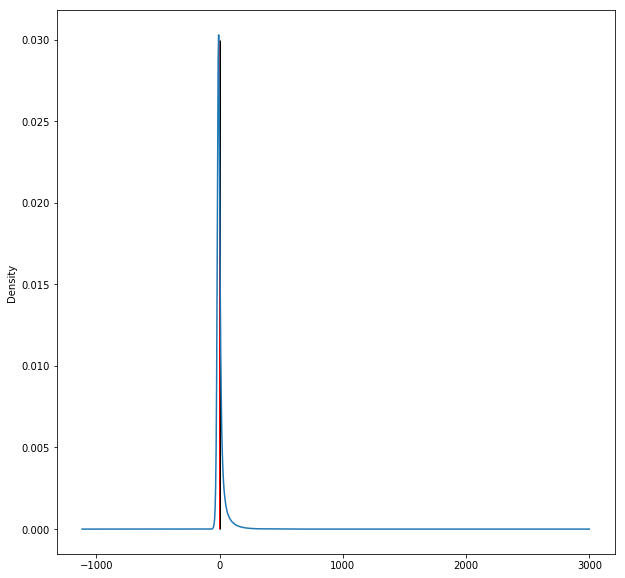

In [94]:
fw['ARRIVAL_DELAY'].plot(kind='density', figsize=(10, 10))

plt.vlines(fw['ARRIVAL_DELAY'].mean(), ymin=0, ymax=0.030, linewidth=1.0)
plt.vlines(fw['ARRIVAL_DELAY'].median(), ymin=0, ymax=0.030, linewidth=1.0, color='red')

There is very little divergence between the mean and median.

### Visualization

#### Boxplots of distributions by month

Let's take a look at some boxplots to see how the data is distributed

1          Axes(0.1,0.736957;0.235294x0.163043)
2     Axes(0.382353,0.736957;0.235294x0.163043)
3     Axes(0.664706,0.736957;0.235294x0.163043)
4          Axes(0.1,0.541304;0.235294x0.163043)
5     Axes(0.382353,0.541304;0.235294x0.163043)
6     Axes(0.664706,0.541304;0.235294x0.163043)
7          Axes(0.1,0.345652;0.235294x0.163043)
8     Axes(0.382353,0.345652;0.235294x0.163043)
9     Axes(0.664706,0.345652;0.235294x0.163043)
10             Axes(0.1,0.15;0.235294x0.163043)
11        Axes(0.382353,0.15;0.235294x0.163043)
12        Axes(0.664706,0.15;0.235294x0.163043)
dtype: object

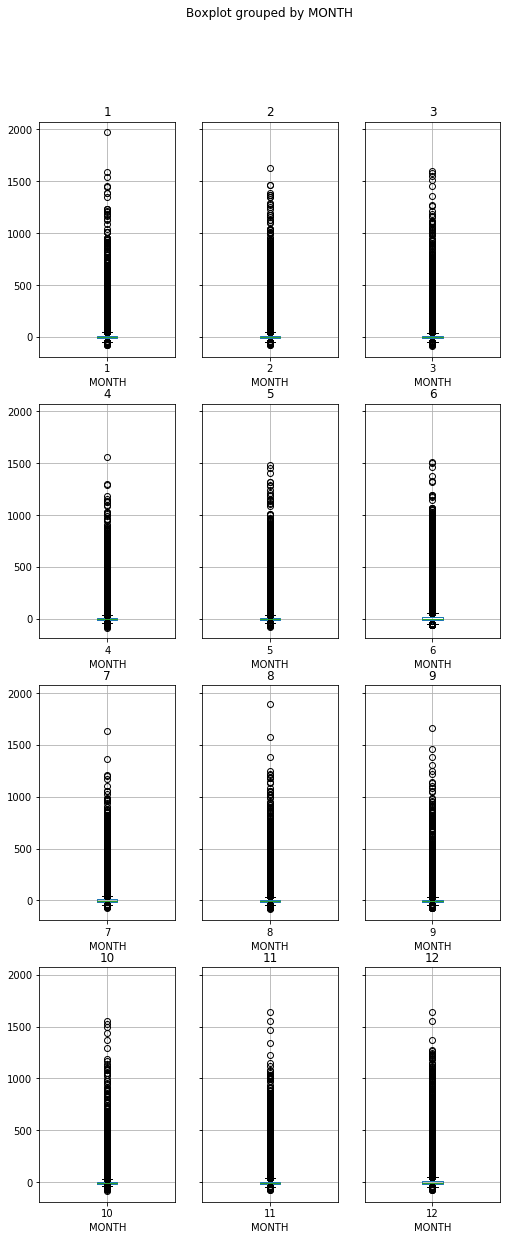

In [7]:
fw_by_month = fw.groupby('MONTH')
fw_by_month.boxplot(column='ARRIVAL_DELAY', by='MONTH', figsize=(8, 20))

These box plots aren't pretty. As we've seen in the previous sections, the means for delay time are pretty low, but there are really long whiskers above the means. It looks like all of the quartiles are pretty tightly centered around the mean, so the **majority** of flights are low-delay.

Also, the max, mins, and means are all pretty consistent month-to-month. We see at least a few very high (24+ hour) delays each month, along with flights that actually arrived early. There doesn't appear to be any significant difference between any of the months.

### Outliers

Looking at the boxplots above, it looks like we might have a lot of outliers that our skewing our data.

As a sanity check, let's check a histogram to see how the distribution looks.

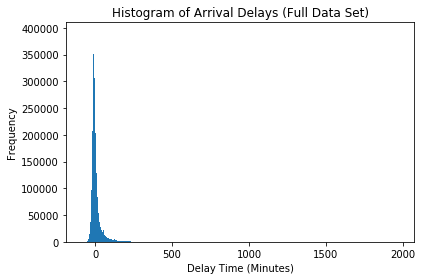

In [9]:
fw['ARRIVAL_DELAY'].plot(kind='hist', bins=1000, title='Histogram of Arrival Delays (Full Data Set)')
plt.xlabel('Delay Time (Minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('../out/images/arrival_delay_hist_full.png', dpi=300)

It does look like the vast majority of our observations are right around the same area (between about -50 and 250). While we have some values that go as high as 2000, there are so few observations that we could throw many of these out.

The main section of the distribution seems to be shaped like a normal distribution. As such, let's try removing any values that don't fall within 3$\sigma$ (3 * standard deviation) of the mean

In [4]:
fw_trim = fw[np.abs(fw['ARRIVAL_DELAY'] - fw['ARRIVAL_DELAY'].mean()) <= (3*fw['ARRIVAL_DELAY'].std())]

Let's try looking at the histogram and boxplots on this trimmed data set.

In [ ]:
fw_trim['ARRIVAL_DELAY'].plot(kind='hist', bins=50, title='Histogram of Arrival Delays (Outliers Removed)')
plt.xlabel('Delay Time (Minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('../out/images/arrival_delay_hist_no_outliers.png', dpi=300)

1          Axes(0.1,0.736957;0.235294x0.163043)
2     Axes(0.382353,0.736957;0.235294x0.163043)
3     Axes(0.664706,0.736957;0.235294x0.163043)
4          Axes(0.1,0.541304;0.235294x0.163043)
5     Axes(0.382353,0.541304;0.235294x0.163043)
6     Axes(0.664706,0.541304;0.235294x0.163043)
7          Axes(0.1,0.345652;0.235294x0.163043)
8     Axes(0.382353,0.345652;0.235294x0.163043)
9     Axes(0.664706,0.345652;0.235294x0.163043)
10             Axes(0.1,0.15;0.235294x0.163043)
11        Axes(0.382353,0.15;0.235294x0.163043)
12        Axes(0.664706,0.15;0.235294x0.163043)
dtype: object

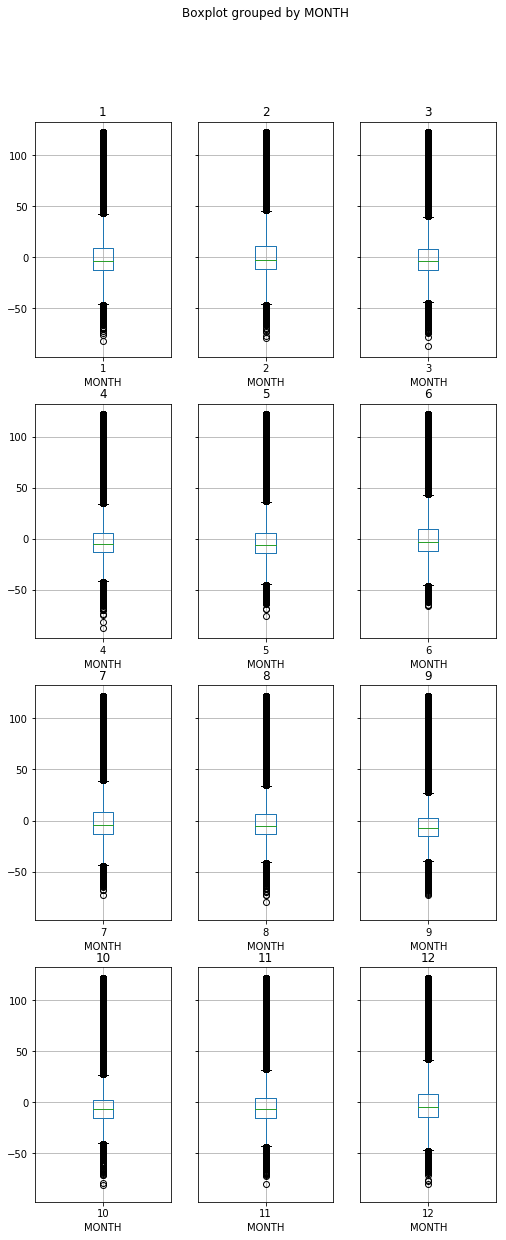

In [12]:
fw_trim_by_month = fw_trim.groupby('MONTH')
fw_trim_by_month.boxplot(column='ARRIVAL_DELAY', by='MONTH', figsize=(8, 20))

That looks much better. Let's continue using the trimmed data in the rest of our visualizations. For good measure, we'll also plot the full data set too.

Let's also make a more concise summary with only 4 boxplots (Jan, April, August, December)

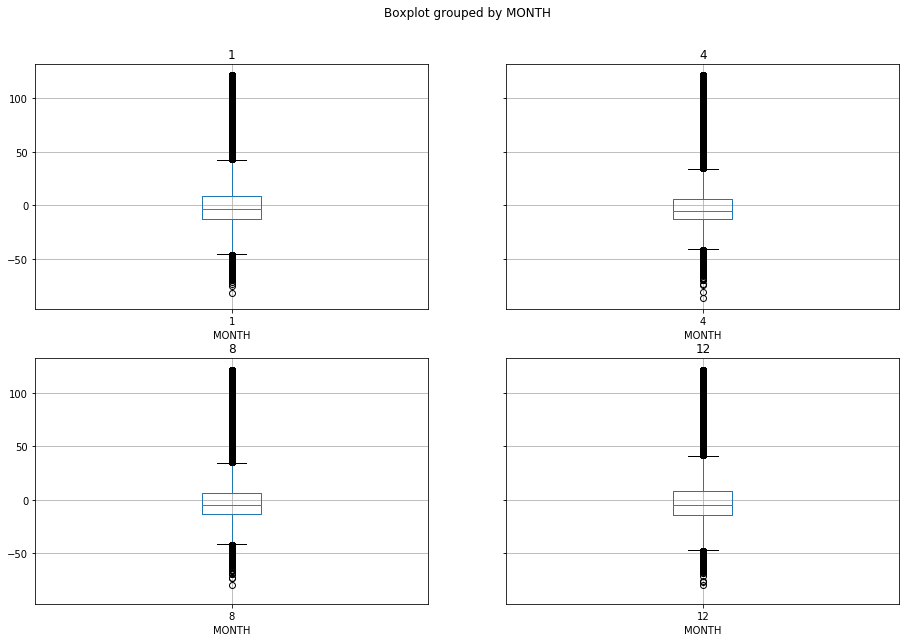

In [26]:
fw_trim_four_months = fw_trim[(fw_trim['MONTH'] == 1) | (fw_trim['MONTH'] % 4 == 0)]
ax = fw_trim_four_months.groupby('MONTH', as_index=False).boxplot(column='ARRIVAL_DELAY', by='MONTH', figsize=(15, 10))

plt.savefig('../out/images/four_month_boxplot.png', dpi=300)

#### Average delay time per month
Let's start by looking at the average delay time per month. We already saw the mean values above. Now let's look at them graphically.

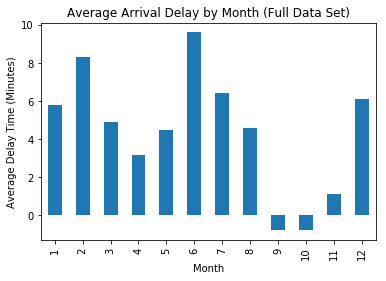

In [76]:
fw_avg_delay = fw.groupby('MONTH', as_index=False)['ARRIVAL_DELAY'].mean()
fw_avg_delay.plot('MONTH', 'ARRIVAL_DELAY', kind='bar', legend=False, title='Average Arrival Delay by Month (Full Data Set)')
plt.xlabel('Month')
plt.ylabel('Average Delay Time (Minutes)')

plt.tight_layout()
plt.savefig('../out/images/average_delay_month_full.png', dpi=300)

It looks like the highest average delays are in the winter and summer months (Dec - Feb, Jun - Jul). This *could* mean that more extreme temperatures affect these delays. The spring and autumn months in between have much lower averages. In fact, in Sep - Oct the average flight arrived even earlier than scheduled.

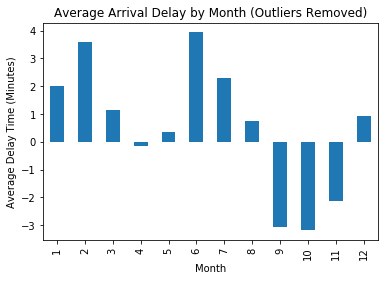

In [77]:
fw_trim_avg_delay = fw_trim.groupby('MONTH', as_index=False)['ARRIVAL_DELAY'].mean()
fw_trim_avg_delay.plot('MONTH', 'ARRIVAL_DELAY', kind='bar', legend=False, title='Average Arrival Delay by Month (Outliers Removed)')
plt.xlabel('Month')
plt.ylabel('Average Delay Time (Minutes)')

plt.tight_layout()
plt.savefig('../out/images/average_delay_month_no_outliers.png', dpi=300)

Removing the outliers has affected this plot a lot. It looks like the autumn months (Sep - Nov) might have had a lot of really high delay outliers that pulled the average up.

#### Average delay time per day
Let's see what happens if we look a little more closely. Next, let's take the averages by day and see if that gives us any greater insight.

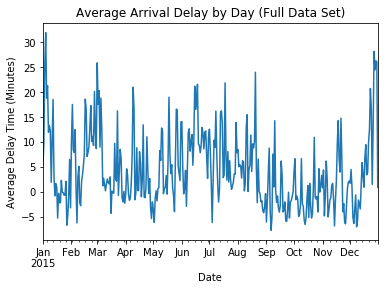

In [78]:
fw_avg_by_date = fw.groupby('DATE', as_index=False)['ARRIVAL_DELAY'].mean()
fw_avg_by_date.plot('DATE', 'ARRIVAL_DELAY', legend=False, title='Average Arrival Delay by Day (Full Data Set)')
plt.xlabel('Date')
plt.ylabel('Average Delay Time (Minutes)')

When looking at average delays by month, it appeared that there were higher delays in the winter and summer months. However, when we break it down to the day, it looks like this might not be in case. We see a pretty uniform spread of variation throughout the entire year. Some days have higher delays while others have lower. But it doesn't appear to skew one way or the other during a particular season in any really significant way. There are some months that seem on the higher side (eg. February), but it doesn't appear to be a significant enough difference to make any claims.

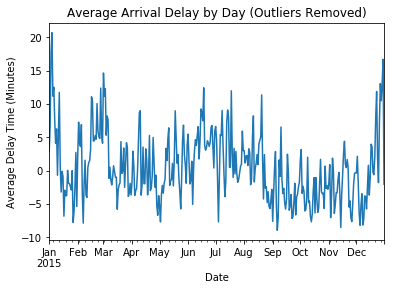

In [79]:
fw_trim_avg_by_date = fw_trim.groupby('DATE', as_index=False)['ARRIVAL_DELAY'].mean()
fw_trim_avg_by_date.plot('DATE', 'ARRIVAL_DELAY', legend=False, title='Average Arrival Delay by Day (Outliers Removed)')
plt.xlabel('Date')
plt.ylabel('Average Delay Time (Minutes)')

It looks like removing the outliers didn't affect this plot too much. On a day-to-day basis, the outliers don't affect the averages very much (as to be expected).

***
## Part 2
* **Conduct Probablity distibution analysis based on the data. Analyze your data based on the type of distribution it best fits (for PDF and CDF)**
* **Conduct Method of Moments analysis on your data to suggest the best fit distribution. Visualize the results**
***

### Probability Distribution Analysis

Let's first take a look at the density of the distribution, along with a CDF of the distribution.

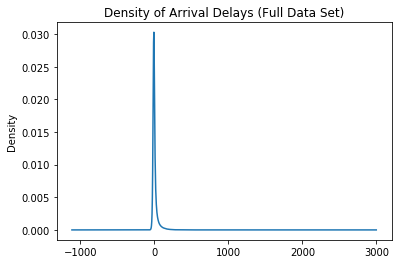

In [17]:
fw['ARRIVAL_DELAY'].plot(kind='density', title='Density of Arrival Delays (Full Data Set)')

It looks like there are many outlier observations, but overall the data follows a normal distribution.

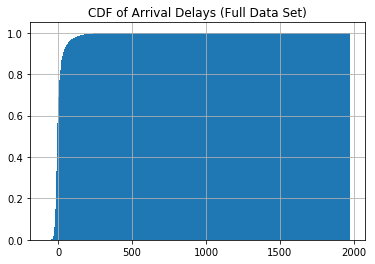

In [18]:
arrival_delays = fw['ARRIVAL_DELAY']
arrival_delays.sort_values()

hist = arrival_delays.hist(cumulative=True, normed=1, bins=1000)
hist.set_title('CDF of Arrival Delays (Full Data Set)')

Both of these plots seem to be heavily affected by the outliers. Let's try these again with the outliers removed.

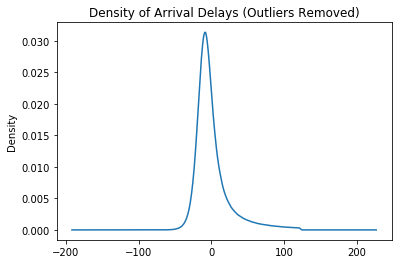

In [19]:
fw_trim['ARRIVAL_DELAY'].plot(kind='density', title='Density of Arrival Delays (Outliers Removed)')

Once we remove the outliers, the normal distribution curve becomes even more apparent.

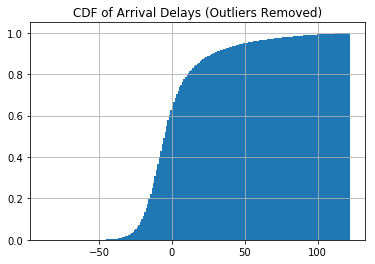

In [20]:
arrival_delays_trim = fw_trim['ARRIVAL_DELAY']
arrival_delays_trim.sort_values()

hist = arrival_delays_trim.hist(cumulative=True, normed=1, bins=1000)
hist.set_title('CDF of Arrival Delays (Outliers Removed)')

Much better! We can see a fairly normal distribution, along with a much clearer CDF.

### Method of Moment Analysis

Calculate the mean of delay times per month. Do this for both the full data set as well as the trimmed data set (without outliers).

In [8]:
delay_mean = fw.groupby('MONTH')['ARRIVAL_DELAY'].mean()
delay_mean

MONTH
1     5.813583
2     8.320500
3     4.920673
4     3.163190
5     4.485019
6     9.601590
7     6.431775
8     4.607372
9    -0.772571
10   -0.780390
11    1.100784
12    6.092903
Name: ARRIVAL_DELAY, dtype: float64

In [9]:
delay_mean_trim = fw_trim.groupby('MONTH')['ARRIVAL_DELAY'].mean()
delay_mean_trim

MONTH
1     2.003700
2     3.588636
3     1.129674
4    -0.136798
5     0.364188
6     3.929400
7     2.303905
8     0.731289
9    -3.075474
10   -3.179868
11   -2.144219
12    0.940500
Name: ARRIVAL_DELAY, dtype: float64

Calculate the variance of delay times per month. Do this for both the full data set as well as the trimmed data set (without outliers).

In [10]:
delay_var = fw.groupby('MONTH')['ARRIVAL_DELAY'].var()
delay_var

MONTH
1     1553.424040
2     1863.349193
3     1537.076333
4     1338.642062
5     1588.491460
6     2025.215453
7     1554.445601
8     1499.505426
9     1045.334290
10    1070.924489
11    1355.892281
12    1982.567649
Name: ARRIVAL_DELAY, dtype: float64

In [11]:
delay_var_trim = fw_trim.groupby('MONTH')['ARRIVAL_DELAY'].var()
delay_var_trim

MONTH
1     625.578078
2     672.380792
3     567.908417
4     518.007137
5     571.892888
6     687.526707
7     637.876487
8     587.081322
9     439.627087
10    409.388325
11    487.668875
12    631.975564
Name: ARRIVAL_DELAY, dtype: float64

Use these moments to estimate $\alpha$ and $\beta$ per month.

In [12]:
alpha_mom = delay_mean ** 2 / delay_var
beta_mom = delay_var / delay_mean

In [13]:
alpha_mom_trim = delay_mean_trim ** 2 / delay_var_trim
beta_mom_trim = delay_var_trim / delay_mean_trim

#### DataFrame Formatting

To make the method of moments plots below, we have to be able to iterate over the columns of a DataFrame in order to make a grid of histograms. If we use the groupby method on the original DataFrame, then we'll get a SeriesGroupBy object that will not produce this type of graph correctly.

In order to fix this, we'll copy the ARRIVAL_DELAY column into a new DataFrame that has one column per month and rows of delay times.

In [ ]:
fw_months = pd.DataFrame(index=range(0, len(fw)), columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

fw_months_groups = fw.groupby('MONTH', as_index=False)['ARRIVAL_DELAY']

for name, group in fw_months_groups:
    group.head()

In [28]:
fw_months = pd.DataFrame(index=range(0, len(fw)), columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# @TODO: What's going on here?! I tried copying each month's arrival delays into a new DataFrame, but only January works! >_<
for x in range(1, 13):
    fw_months[x] = fw[fw['MONTH'] == x]['ARRIVAL_DELAY']
    
fw_months.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,-22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


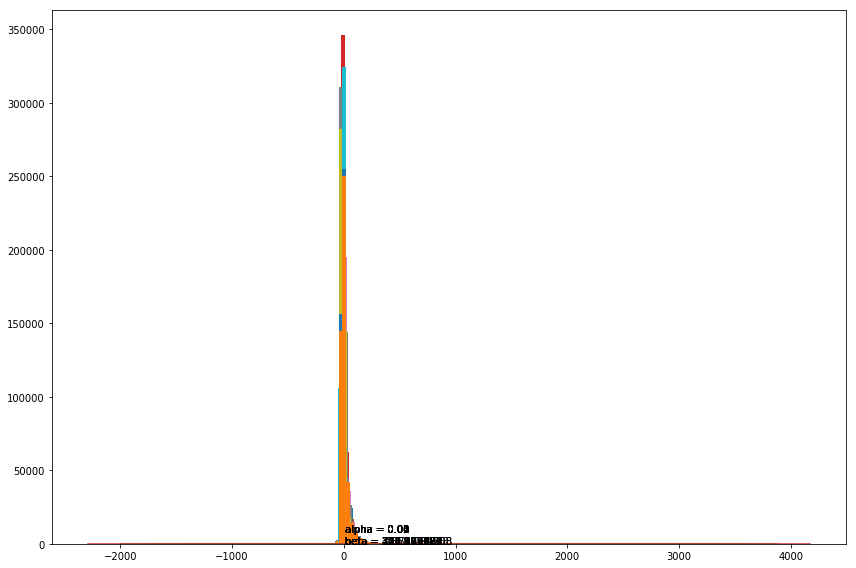

In [68]:
from scipy.stats.distributions import gamma

axs = fw.groupby('MONTH')['ARRIVAL_DELAY'].hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=50, grid=False, ec='black')

month = 1

for ax in axs.ravel():    
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[month], beta_mom[month]))
    
    label = 'alpha = {0:.2f}\nbeta = {1:2f}'.format(alpha_mom[month], beta_mom[month])
    ax.annotate(label, xy=(10, 0.2))
    
    month += 1
    
plt.tight_layout()

***
## Part 3
* **Formulate a null hypothesis and evaluate it, perform correlation measures, and construct a linear regression model**
***

### Hypothesis Testing

**Null Hypothesis:** 'Extreme' temperatures do not affect flight delays.

**Alternate Hypothesis:** 'Extreme' temperature affects flight delays.

First, we need to determine what 'extreme' temperature values are. We'll use quartiles in order to split the data into parts. Anything that falls within $\mu$ $\pm$ $\sigma$ will be considered 'normal' temperature. Everything outside of that will be part of the 'extreme' set.

In [153]:
temp_mean = fw['OR_TEMP'].mean()
temp_std = fw['OR_TEMP'].std()

temp_min = temp_mean - temp_std
temp_max = temp_mean + temp_std

print 'Min Normal Temp: ' + str(temp_min)
print 'Max Normal Temp: ' + str(temp_max)

Min Normal Temp: 43.0232995253
Max Normal Temp: 79.6442825133


In [156]:
fw_normal = fw[(fw['OR_TEMP'] <= temp_max) & (fw['OR_TEMP'] >= temp_min)]
fw_extreme = fw[(fw['OR_TEMP'] > temp_max) | (fw['OR_TEMP'] < temp_min)]

print '\'Normal\' Set: ' + str(fw_normal.shape)
print '\'Extreme\' Set: ' + str(fw_extreme.shape)

'Normal' Set: (3651231, 74)
'Extreme' Set: (1681683, 74)


In [157]:
# Check if the variances are equal in order to set the equal_var flag in the t-test call below.

print fw_normal['ARRIVAL_DELAY'].var()
print fw_extreme['ARRIVAL_DELAY'].var()

1451.61005975
1865.69536019


Now that we have our two sets (flights with 'normal' weather and flights with 'extreme' weather) we can now run a **two-sample t-test**.

In [158]:
stats.ttest_ind(a=fw_normal['ARRIVAL_DELAY'].dropna(), b=fw_extreme['ARRIVAL_DELAY'].dropna())

Ttest_indResult(statistic=-85.260587927183565, pvalue=0.0)

### Conclusion

**p-value** = 0.0

We can reject the null hypothesis and accept the alternate hypothesis - "extreme" temperatures ** *do* ** have an effect on flight delays.

#### Sanity Check

Let's do some sanity checking to verify that this result is correct. Let's start by looking at the means per month for both sets.

In [144]:
fw_normal.groupby('MONTH')['ARRIVAL_DELAY'].mean()

MONTH
1     4.231838
2     4.698296
3     3.255223
4     2.925898
5     4.385553
6     8.963620
7     6.601047
8     4.385309
9    -1.099071
11    0.732444
12    5.134191
Name: ARRIVAL_DELAY, dtype: float64

In [139]:
fw_extreme.groupby('MONTH')['ARRIVAL_DELAY'].mean()

MONTH
1      7.197735
2     11.828062
3      8.999320
4      5.323593
5      5.564385
6     10.831264
7      6.220022
8      4.983218
9      0.096472
11     2.419731
12     8.374254
Name: ARRIVAL_DELAY, dtype: float64

Just at first glance, it does look like flights under "extreme" temperatures have different average delay times. For example, in the months of Jan-March, the average delay was much higher under extreme temperatuers. It looks like this also holds true in the summer months as well. The fall months are less prone to this affect, with average delays relatively the same in Sep-Nov.

#### Visualization

Let's also make some scatter plots of Delay vs. Temperature to see if we can visually spot the difference in trends.

First we'll start with the full data set.

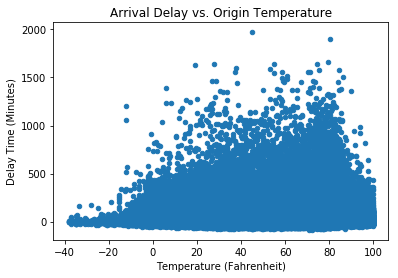

In [206]:
fw.plot('OR_TEMP', 'ARRIVAL_DELAY', kind='scatter', title='Arrival Delay vs. Origin Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Delay Time (Minutes)')

Although the bottom of the graph is pretty filled in (looks like a solid triangle), we can also see a upward trend in arrival delay with temperature all the way up until about 80 degrees, then the it trends back down.

Next, let's isolate just the 'normal' temperatures.

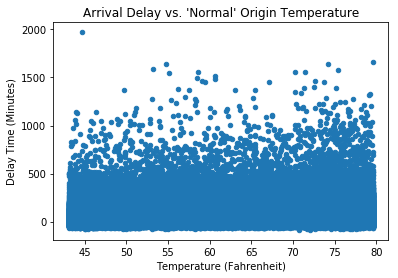

In [207]:
fw_normal.plot('OR_TEMP', 'ARRIVAL_DELAY', kind='scatter', title='Arrival Delay vs. \'Normal\' Origin Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Delay Time (Minutes)')

Now, this plot looks much more uniform. There is a solid bar of observations at the bottom, along with observations that fall above that, but in a fairly uniform pattern across the plot.

Finally, we'll look at the 'extreme' temperatures and see what that plot looks like.

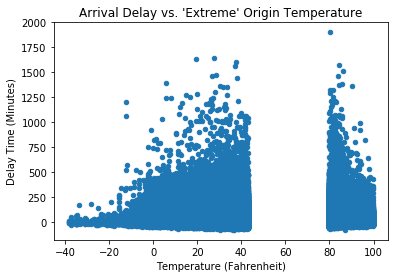

In [203]:
fw_extreme.plot('OR_TEMP', 'ARRIVAL_DELAY', kind='scatter', title='Arrival Delay vs. \'Extreme\' Origin Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Delay Time (Minutes)')

This plot is *much* less uniform. We can see the upward trend of delays on the left, followed by the missing section (normal temperatures - which we saw had no trend), and ending with the downward trend on the right.

### Correlation Analysis

Now we'll analyze any correlations between delay times and weather features using a correlation heatmap, as well as a correlation matrix.

In [87]:
fw_corr_df = fw[[
    'MONTH', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 
    'OR_TEMP', 'OR_DEWP', 'OR_SLP', 'OR_VISIB', 'OR_WDSP', 'OR_GUST', 'OR_PRCP', 
    'DES_TEMP', 'DES_DEWP', 'DES_SLP', 'DES_VISIB', 'DES_WDSP', 'DES_GUST', 'DES_PRCP']].copy()

fw_corr_df['OR_PRCP'].dropna(inplace=True)
fw_corr_df['OR_PRCP'] = fw_corr_df['OR_PRCP'].apply(lambda x: float(str(x)[:-1]))

fw_corr_df['DES_PRCP'].dropna(inplace=True)
fw_corr_df['DES_PRCP'] = fw_corr_df['DES_PRCP'].apply(lambda x: float(str(x)[:-1]))

fw_corr = fw_corr_df.corr()

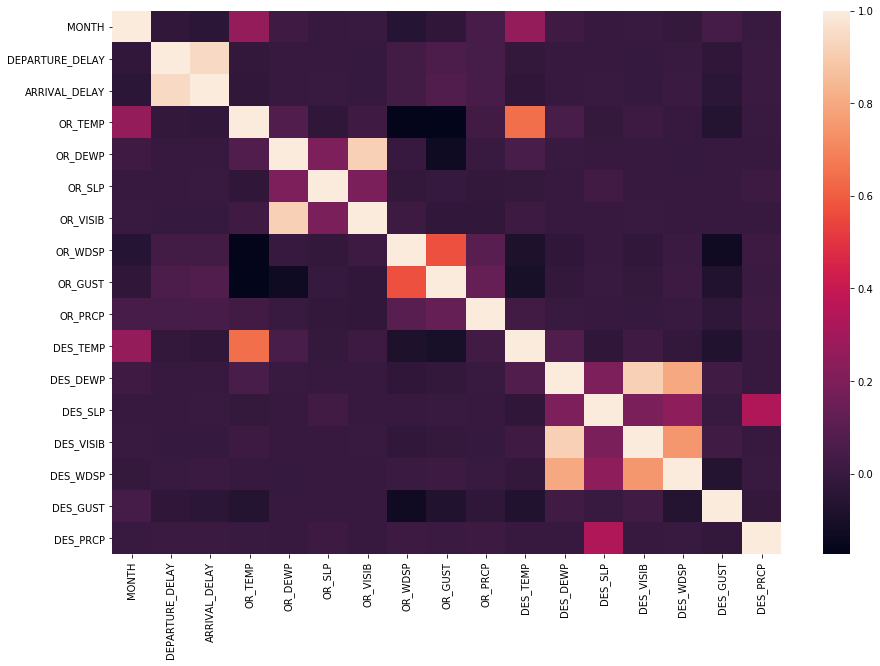

In [91]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(
    fw_corr,
    xticklabels = fw_corr.columns.values,
    yticklabels = fw_corr.columns.values,
    ax = ax
)

Unfortunately, it looks like we don't have any strong correlations between delay time and any of the weather features.

In [132]:
fw_corr

,MONTH,DEPARTURE_DELAY,ARRIVAL_DELAY,OR_TEMP,OR_DEWP,OR_SLP,OR_VISIB,OR_WDSP,OR_GUST,OR_PRCP,DES_TEMP,DES_DEWP,DES_SLP,DES_VISIB,DES_WDSP,DES_GUST,DES_PRCP
MONTH,1.000000,-0.021994,-0.036793,0.266299,0.022474,-0.002923,0.004034,-0.057170,-0.026213,0.048944,0.266336,0.022473,-0.002937,0.004021,-0.009885,0.039996,0.004463
DEPARTURE_DELAY,-0.021994,1.000000,0.944672,-0.015897,-0.002190,-0.003120,-0.007267,0.035807,0.060634,0.044664,-0.014506,-0.001804,-0.000389,-0.006233,0.001950,-0.026606,0.006055
ARRIVAL_DELAY,-0.036793,0.944672,1.000000,-0.019712,0.000262,0.001867,-0.006124,0.034739,0.071798,0.048090,-0.024043,0.000387,0.004068,-0.005159,0.006343,-0.037943,0.009528
OR_TEMP,0.266299,-0.015897,-0.019712,1.000000,0.072197,-0.024922,0.020304,-0.165671,-0.173708,0.028412,0.646097,0.053607,-0.009021,0.017867,-0.002815,-0.060979,0.004376
OR_DEWP,0.022474,-0.002190,0.000262,0.072197,1.000000,0.200008,0.915438,-0.001545,-0.132381,0.004439,0.053523,0.002027,-0.002810,-0.000371,-0.005054,-0.001939,-0.000343
OR_SLP,-0.002923,-0.003120,0.001867,-0.024922,0.200008,1.000000,0.190076,-0.015738,-0.008545,-0.015614,-0.008910,-0.002835,0.029593,-0.002116,-0.001400,-0.000522,0.010913
OR_VISIB,0.004034,-0.007267,-0.006124,0.020304,0.915438,0.190076,1.000000,0.015146,-0.018598,-0.019072,0.017871,-0.000374,-0.002125,0.000691,-0.003064,-0.000030,-0.001841
OR_WDSP,-0.057170,0.035807,0.034739,-0.165671,-0.001545,-0.015738,0.015146,1.000000,0.572915,0.094236,-0.083047,-0.024581,0.000286,-0.018410,0.005576,-0.125372,0.009773
OR_GUST,-0.026213,0.060634,0.071798,-0.173708,-0.132381,-0.008545,-0.018598,0.572915,1.000000,0.134991,-0.098996,-0.015403,0.002521,-0.009050,0.011907,-0.069726,0.006255
OR_PRCP,0.048944,0.044664,0.048090,0.028412,0.004439,-0.015614,-0.019072,0.094236,0.134991,1.000000,0.031424,0.000673,-0.000341,-0.006746,0.000644,-0.029305,0.013772


### Let's try the correlation analysis again on only the delayed flights

Remove non-delayed flights from the DataFrame

In [28]:
fw_only_delay = fw[(fw['ARRIVAL_DELAY'] > 0) | (fw['DEPARTURE_DELAY'] > 0) | (fw['WEATHER_DELAY'] > 0)]
fw_only_delay.shape

(2704367, 75)

In [39]:
fw_corr_delay_df = fw_only_delay[[
    'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'WEATHER_DELAY',
    'OR_TEMP', 'OR_DEWP', 'OR_SLP', 'OR_VISIB', 'OR_WDSP', 'OR_GUST', 'OR_PRCP', 'OR_MIN', 'OR_MAX']].copy()

fw_corr_delay = fw_corr_delay_df.corr()

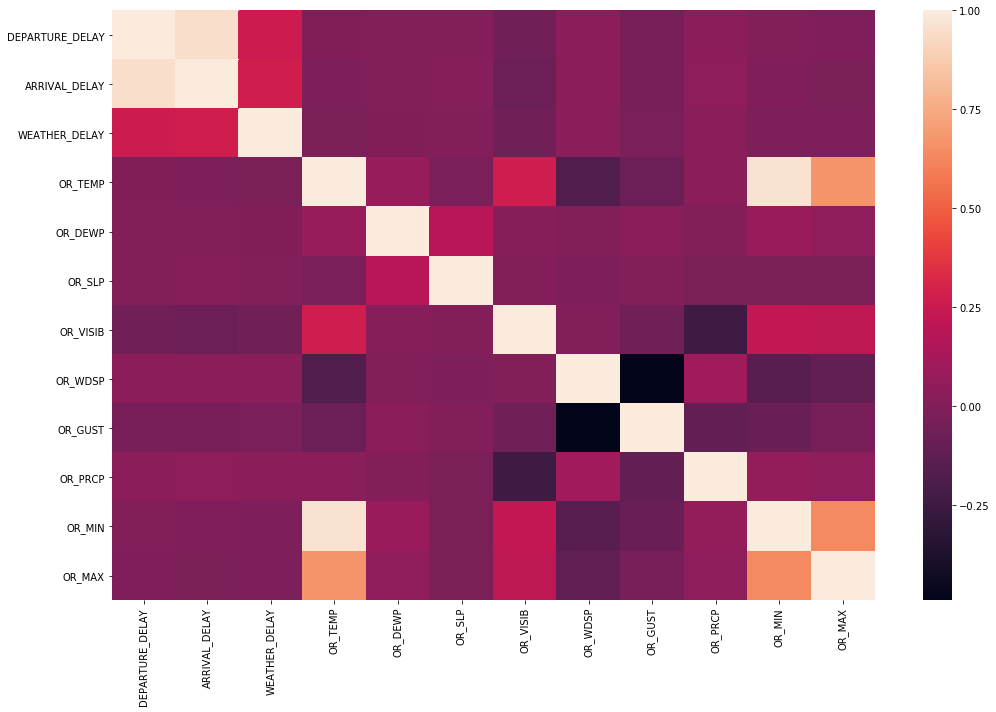

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(
    fw_corr_delay,
    xticklabels = fw_corr_delay.columns.values,
    yticklabels = fw_corr_delay.columns.values,
    ax = ax
)

plt.tight_layout()
plt.savefig('../out/images/heatmap.png', dpi=300)

Next, let's try the same heatmap with only weather delayed flights.

In [31]:
fw_only_weather_delay = fw[fw['WEATHER_DELAY'] != 0]
fw_only_weather_delay.shape

(64716, 75)

In [26]:
fw_corr_weather_delay_df = fw_only_weather_delay[[
    'WEATHER_DELAY', 'OR_TEMP', 'OR_DEWP', 'OR_SLP', 
    'OR_VISIB', 'OR_WDSP', 'OR_GUST', 'OR_PRCP', 'OR_MIN', 'OR_MAX']].copy()

fw_corr_weather_delay = fw_corr_weather_delay_df.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

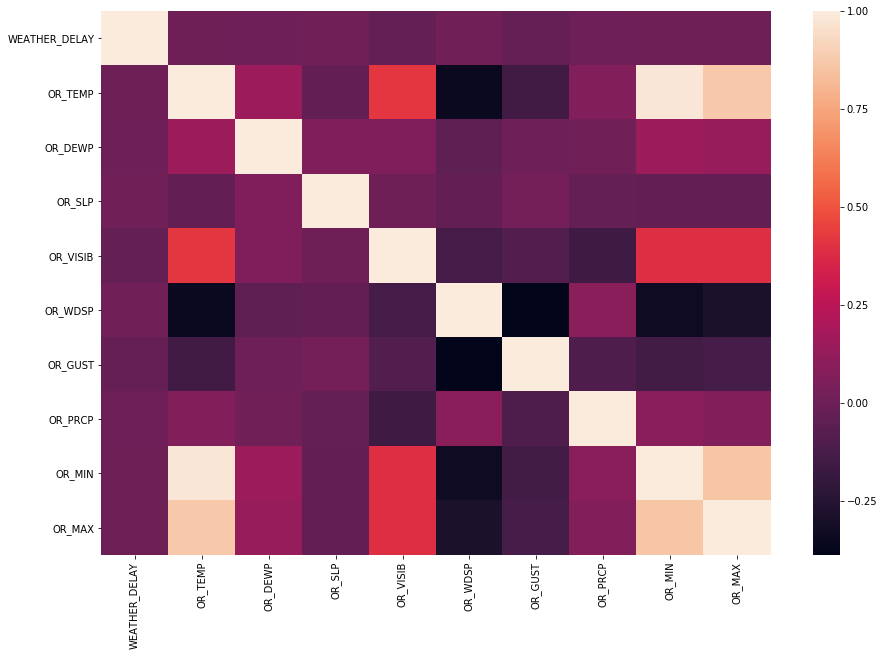

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(
    fw_corr_weather_delay,
    xticklabels = fw_corr_weather_delay.columns.values,
    yticklabels = fw_corr_weather_delay.columns.values,
    ax = ax
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)

## Pairplot

Now let's try making a pairplot using only delayed flights.

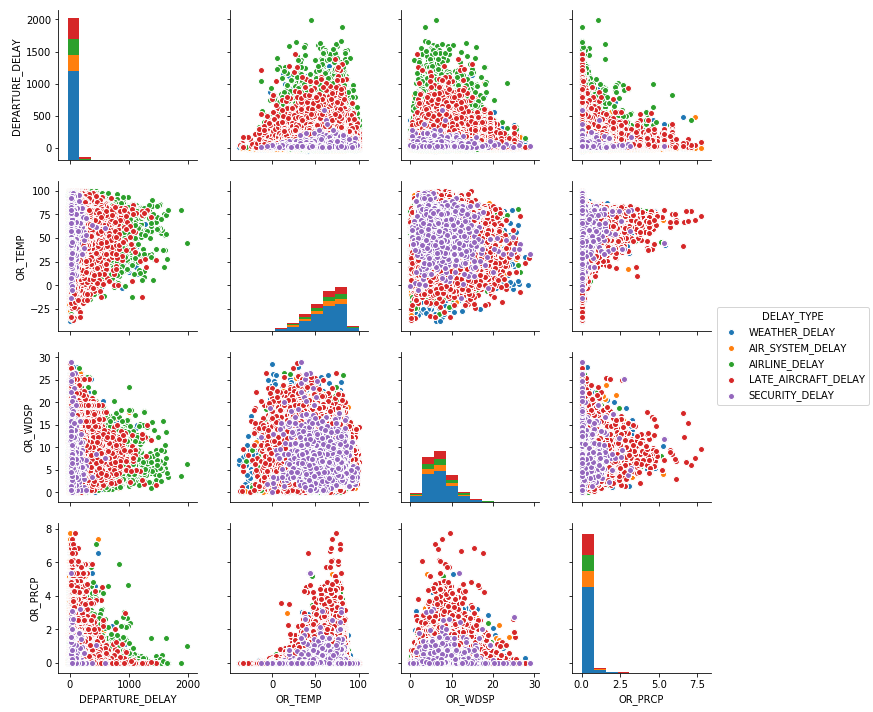

In [36]:
fw_pair_delay = fw_only_delay[[
    'DEPARTURE_DELAY', 'DELAY_TYPE', 
    'OR_TEMP', 'OR_WDSP', 'OR_PRCP']].copy()

v = ['DEPARTURE_DELAY', 'OR_TEMP', 'OR_WDSP', 'OR_PRCP']

sns.pairplot(fw_pair_delay.dropna(), vars=v, hue='DELAY_TYPE')

plt.savefig('../out/images/pairplot_all_delays.png', dpi=300)

Finally, let's also make a pairplot using only weather delayed flights

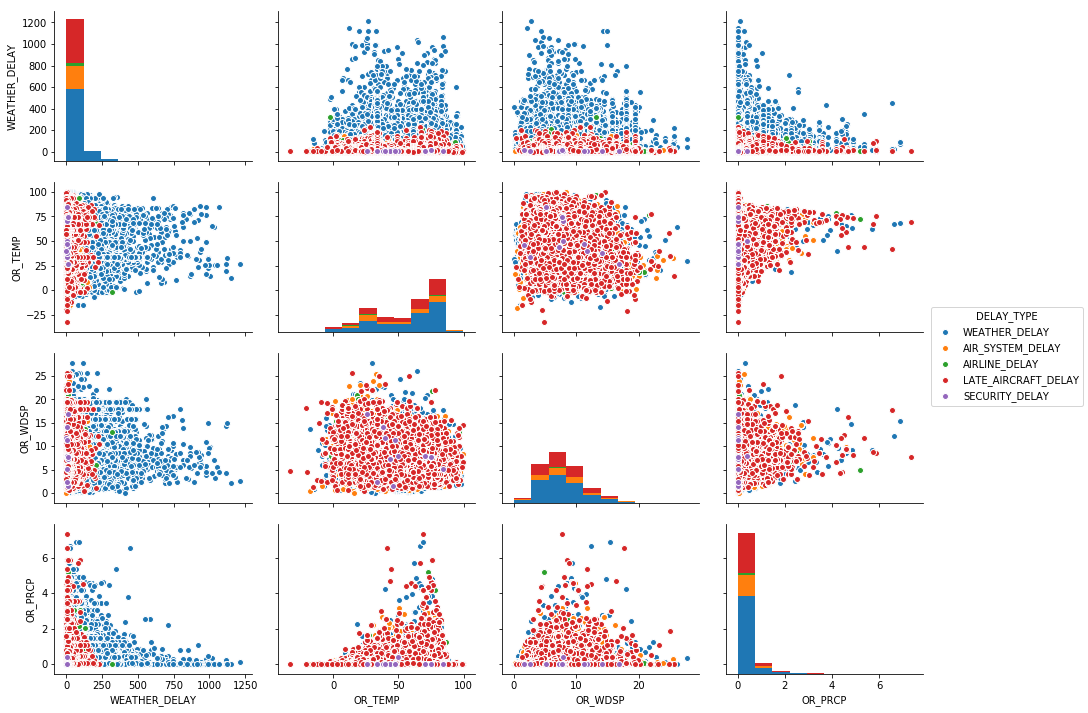

In [35]:
fw_pair_weather_delay = fw_only_weather_delay[[
    'WEATHER_DELAY', 'DELAY_TYPE',
    'OR_TEMP', 'OR_WDSP', 'OR_PRCP']].copy()

v = ['WEATHER_DELAY', 'OR_TEMP', 'OR_WDSP', 'OR_PRCP']

sns.pairplot(fw_pair_weather_delay.dropna(), vars=v, hue='DELAY_TYPE', aspect=1.3)

plt.savefig('../out/images/pairplot_weather_delays.png', dpi=300)

### Linear Regression

Let's first estimate the model coefficients for the data.

In [216]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='ARRIVAL_DELAY ~ OR_TEMP', data=fw).fit()

lm.params

Intercept    7.543403
OR_TEMP     -0.043193
dtype: float64

In [217]:
# Create a DataFrame with the minimum and maximum values of OR_TEMP
X_new = pd.DataFrame({'OR_TEMP': [fw.OR_TEMP.min(), fw.OR_TEMP.max()]})
X_new.head()

,OR_TEMP
0,-38.2
1,99.8


In [218]:
# Make predictions for these x values and store them
preds = lm.predict(X_new)
preds

0    9.193378
1    3.232736
dtype: float64

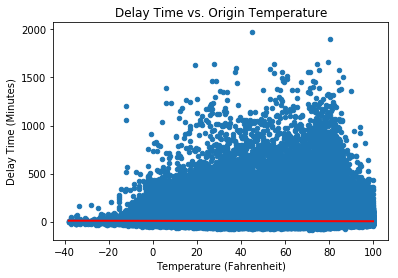

In [204]:
# First, plot the observed data
fw.plot('OR_TEMP', 'ARRIVAL_DELAY', kind='scatter', title='Delay Time vs. Origin Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Delay Time (Minutes)')

# Then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

Upon visual inspection, we can see that the data doesn't seem to fit a linear trend. This fact also seems to be reflected in the regression line. The line of best fit is basically a horizontal line that's very close to zero. This does make sense because the means of delay time per month are pretty low anyway.

### Linear Regression, Part 2 (Extreme Temperatures)

In the previous part, we actaully did seem to find a correlation between temperature and delay time when the temperature was "extreme." Let's try a regression again, but this time on the extreme temp set.

In [209]:
lm_extreme = smf.ols(formula='ARRIVAL_DELAY ~ OR_TEMP', data=fw_extreme).fit()

lm_extreme.params

Intercept    11.228797
OR_TEMP      -0.073978
dtype: float64

In [199]:
# Create a DataFrame with the minimum and maximum values of OR_TEMP
X_new_extreme = pd.DataFrame({'OR_TEMP': [fw_extreme.OR_TEMP.min(), fw_extreme.OR_TEMP.max()]})
X_new_extreme.head()

,OR_TEMP
0,-38.2
1,99.8


In [200]:
# Make predictions for these x values and store them
preds_extreme = lm.predict(X_new_extreme)
preds_extreme

0    14.054759
1     3.845787
dtype: float64

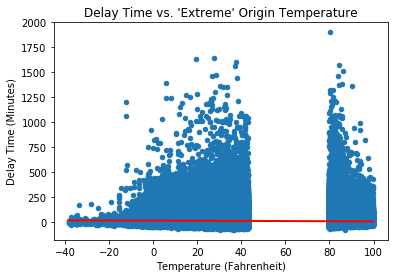

In [205]:
# First, plot the observed data
fw_extreme.plot('OR_TEMP', 'ARRIVAL_DELAY', kind='scatter', title='Delay Time vs. \'Extreme\' Origin Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Delay Time (Minutes)')

# Then, plot the least squares line
plt.plot(X_new_extreme, preds_extreme, c='red', linewidth=2)

This regression is also not very good, as this data also doesn't seem to follow a linear trend (although there does seem to be these upward and downward trends in the max values per temp).

### Hypothesis Testing, Part 2

Let's take a look at the p-values from the regression model and see how that compares to our test before.

In [215]:
# Print the confidence intervals for the model coefficients
lm_extreme.conf_int()

,0,1
Intercept,11.081103,11.376492
OR_TEMP,-0.076336,-0.071620


In [210]:
lm_extreme.pvalues

Intercept    0.0
OR_TEMP      0.0
dtype: float64

#### Conclusion

**p-value:** = 0.0

It looks like we're getting the same result, p=value = 0. This means we can reject the null hypothesis and conclude that there *is* a relationship between extreme temperature and arrival delay (although that relationship is not linear).